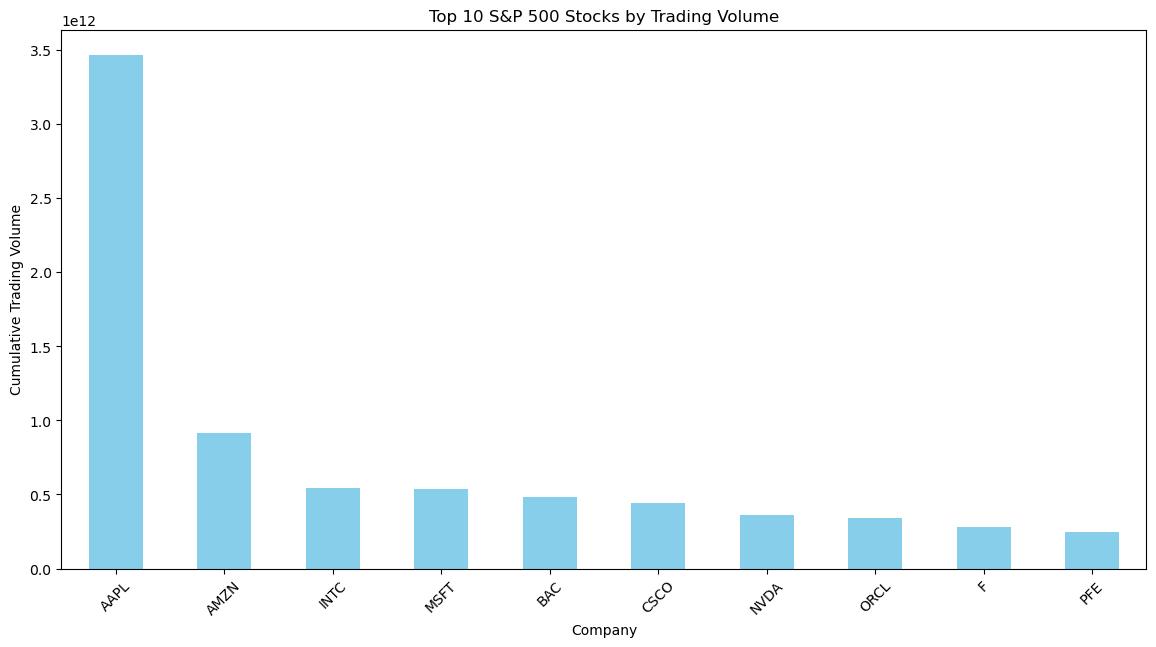

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_directory = './Data'
all_data = pd.DataFrame()

for file in os.listdir(data_directory):
    if file.endswith('.csv'):
        file_path = os.path.join(data_directory, file)
        temp_df = pd.read_csv(file_path)
        temp_df['Company'] = file.replace('.csv', '')
        
        # Append the temporary DataFrame to the main DataFrame
        all_data = pd.concat([all_data, temp_df])

# Convert the Date column to datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Convert the Volume column to numeric
all_data['Volume'] = pd.to_numeric(all_data['Volume'], errors='coerce')

# Aggregate trading volume 
# Identify the top 10 by volume
top_10_by_volume = all_data.groupby('Company')['Volume'].sum().nlargest(10)
top_10_by_volume.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Top 10 S&P 500 Stocks by Trading Volume')
plt.xlabel('Company')
plt.ylabel('Cumulative Trading Volume')
plt.xticks(rotation=45)
plt.show()


Company
NVR      11.520938
BKNG      9.915701
GOOGL     7.257952
GOOG      7.239582
CMG       6.378100
AIG       5.107670
MRNA      3.907343
TSLA      3.837452
AZO       3.458131
NOW       3.343958
Name: Abs_Price_Change, dtype: float64


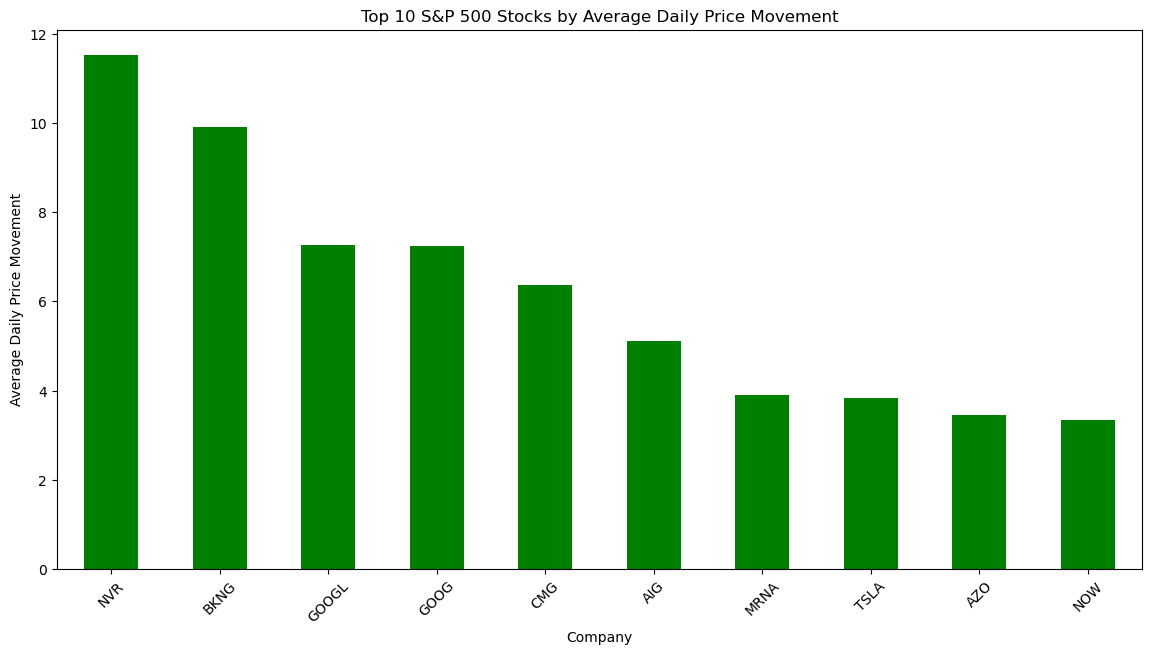

In [2]:
# Daily price change
all_data['Price_Change'] = all_data['Close'] - all_data['Open']
all_data['Abs_Price_Change'] = all_data['Price_Change'].abs()

# Average absolute daily price change per company
avg_daily_movement = all_data.groupby('Company')['Abs_Price_Change'].mean()

# Top 10 companies with the highest average daily price movement
top_10_movement = avg_daily_movement.nlargest(10)
print(top_10_movement)

top_10_movement.plot(kind='bar', figsize=(14, 7), color='green')
plt.title('Top 10 S&P 500 Stocks by Average Daily Price Movement')
plt.xlabel('Company')
plt.ylabel('Average Daily Price Movement')
plt.xticks(rotation=45)
plt.show()


Top 10 most volatile stocks:
Company
NVR     4.374905
ENPH    0.840126
MRNA    0.817957
MNST    0.805510
AAL     0.680988
ABMD    0.669447
UAL     0.668319
REGN    0.658347
AKAM    0.656646
INCY    0.652904
Name: Daily_Return, dtype: float64


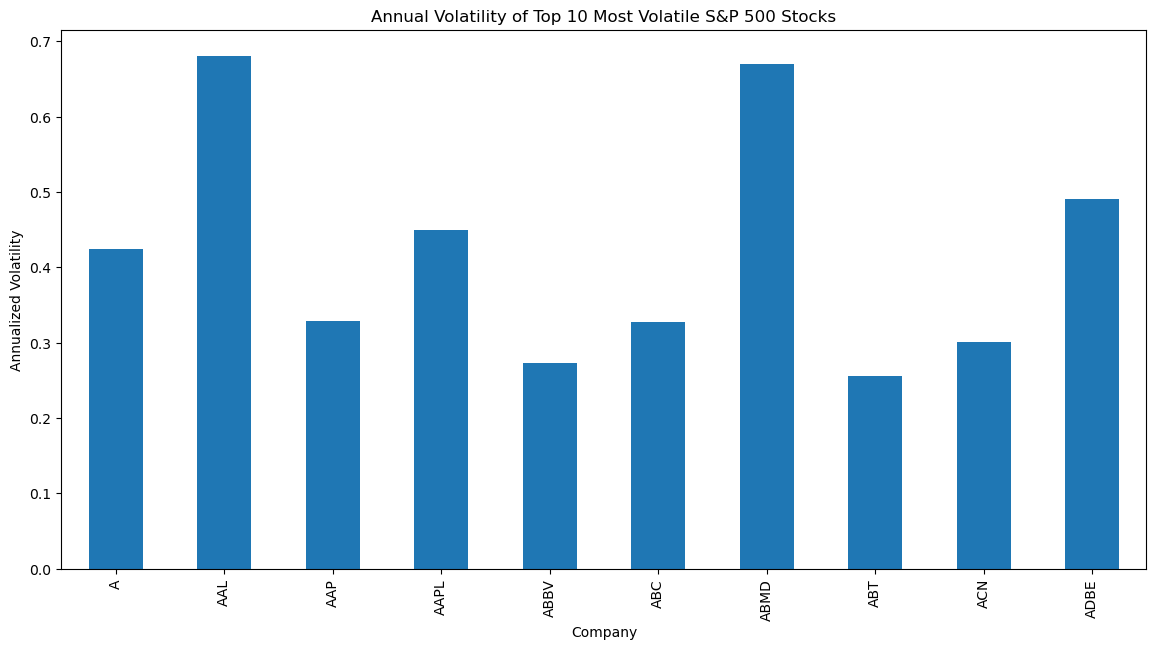

In [3]:
import numpy as np

# Calculate daily returns for each stock
all_data['Daily_Return'] = all_data.groupby('Company')['Close'].pct_change()

# Calculate daily volatility and annualize it
daily_volatility = all_data.groupby('Company')['Daily_Return'].std()
annual_volatility = daily_volatility * np.sqrt(252)

print("Top 10 most volatile stocks:")
print(annual_volatility.sort_values(ascending=False).head(10))

annual_volatility.head(10).plot(kind='bar', figsize=(14, 7))
plt.title('Annual Volatility of Top 10 Most Volatile S&P 500 Stocks')
plt.xlabel('Company')
plt.ylabel('Annualized Volatility')
plt.show()


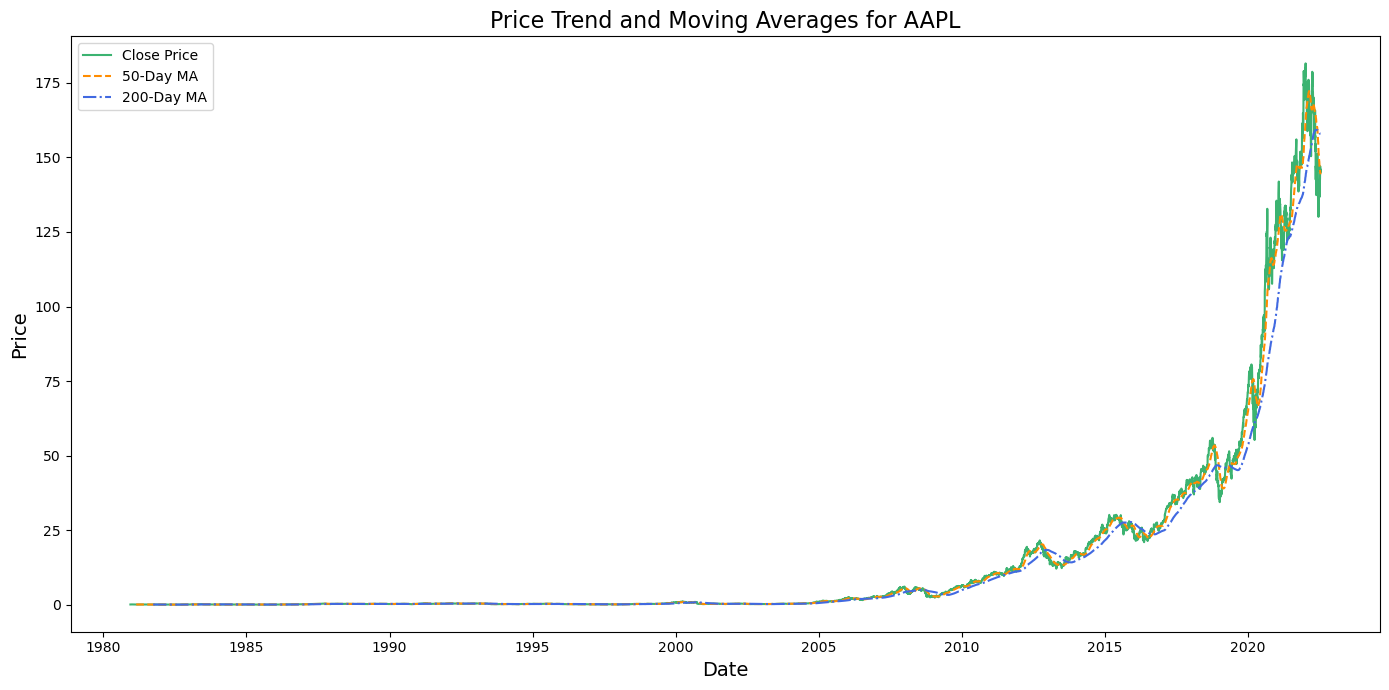

In [4]:
# Filter data for a single company for clearer trend analysis
company_data = all_data[all_data['Company'] == 'AAPL']

plt.figure(figsize=(14, 7))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='mediumseagreen')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=50).mean(), label='50-Day MA', color='darkorange', linestyle='--')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=200).mean(), label='200-Day MA', color='royalblue', linestyle='-.')
plt.title('Price Trend and Moving Averages for AAPL', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


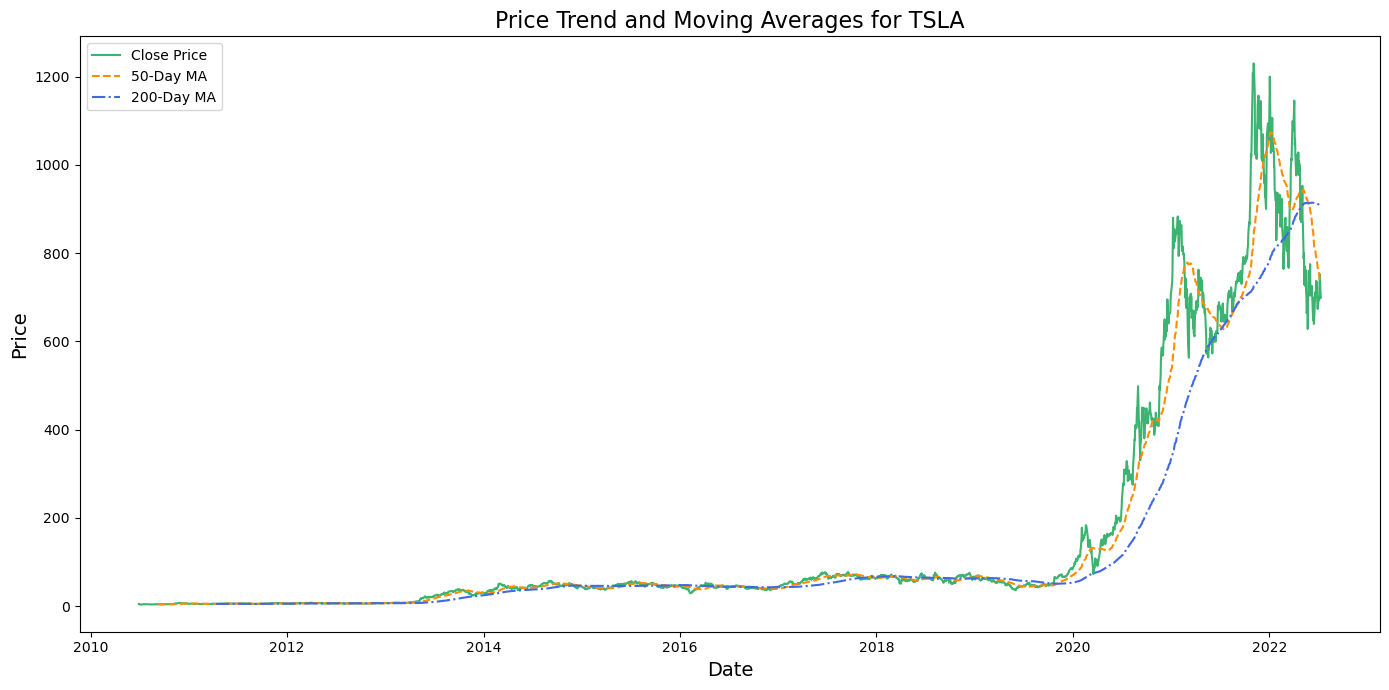

In [6]:
# Filter data for a single company for clearer trend analysis
company_data = all_data[all_data['Company'] == 'TSLA']

plt.figure(figsize=(14, 7))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='mediumseagreen')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=50).mean(), label='50-Day MA', color='darkorange', linestyle='--')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=200).mean(), label='200-Day MA', color='royalblue', linestyle='-.')
plt.title('Price Trend and Moving Averages for TSLA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

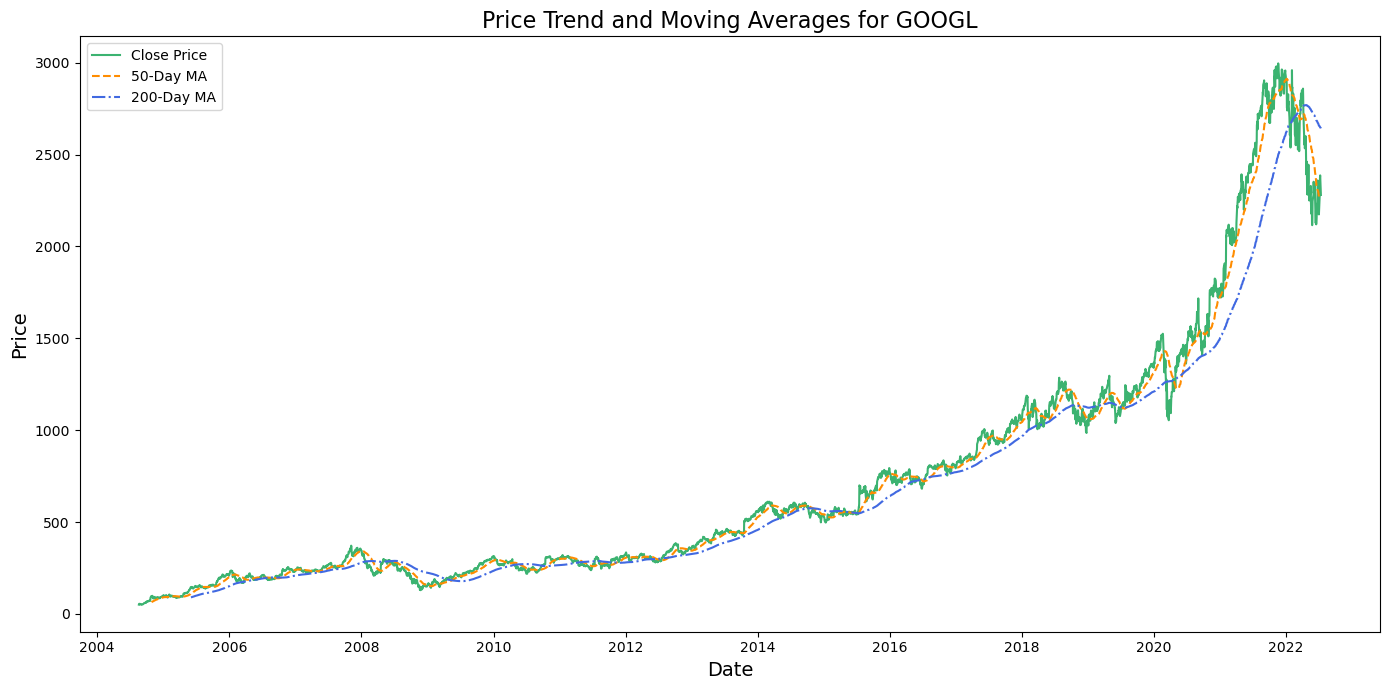

In [7]:
# Filter data for a single company for clearer trend analysis
company_data = all_data[all_data['Company'] == 'GOOGL']

plt.figure(figsize=(14, 7))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='mediumseagreen')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=50).mean(), label='50-Day MA', color='darkorange', linestyle='--')
plt.plot(company_data['Date'], company_data['Close'].rolling(window=200).mean(), label='200-Day MA', color='royalblue', linestyle='-.')
plt.title('Price Trend and Moving Averages for GOOGL', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\traia\AppData\Local\Temp\ipykernel_4344\1455310090.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['Daily_Return'] = top_10_data.groupby('Company')['Close'].pct_change()


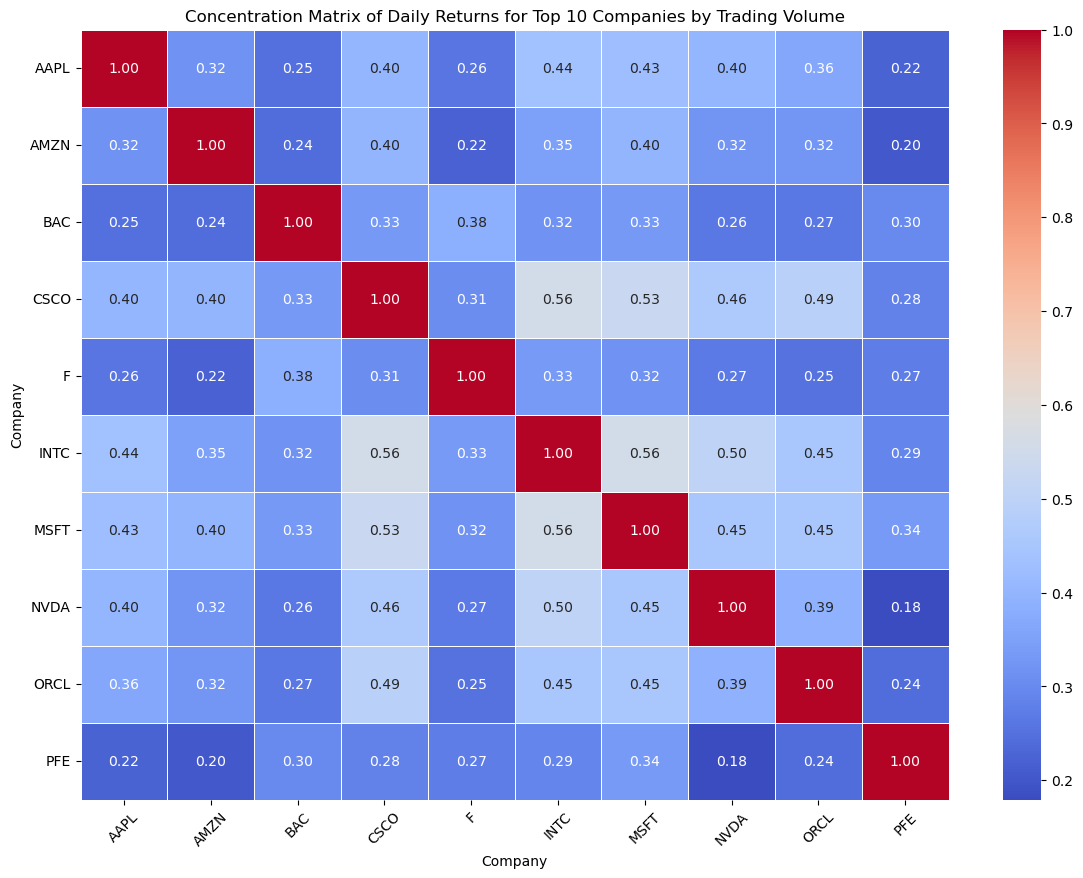

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

data_directory = './Data'
all_data = pd.DataFrame()


for file in os.listdir(data_directory):
    if file.endswith('.csv'):
        file_path = os.path.join(data_directory, file)
        temp_df = pd.read_csv(file_path)
        temp_df['Company'] = file.replace('.csv', '')
        all_data = pd.concat([all_data, temp_df])

# Convert the Date to datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Convert the Volume to numeric
all_data['Volume'] = pd.to_numeric(all_data['Volume'], errors='coerce')
top_10_by_volume = all_data.groupby('Company')['Volume'].sum().nlargest(10).index
top_10_data = all_data[all_data['Company'].isin(top_10_by_volume)]

# Calculate daily returns for each stock
top_10_data['Daily_Return'] = top_10_data.groupby('Company')['Close'].pct_change()
returns_pivot = top_10_data.pivot(index='Date', columns='Company', values='Daily_Return')

# Correlation matrix
correlation_matrix = returns_pivot.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Concentration Matrix of Daily Returns for Top 10 Companies by Trading Volume')
plt.xlabel('Company')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
